In [ ]:
import pandas as pd


data = {
    'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/20/2024'],
    'mpid': ['ABC', 'DEF', 'ABC', 'DEF'],
    'token': [123, 456, 123, 456],
    'score': [0.85, 0.7, 0.9, 0.6],
    'executionCount': [10, 15, 8, 12],
    'executionQuantity': [100, 150, 80, 120],
    'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40]
}

#
# number of days when grouped by mpid that score is less than prod score
# number of days where score is between [0.13,0.17] and [0.47,0.53]
# 4:00
# 3. number of times prod score changes
# 4:02
# for each of the above I will give you two things
# groupedbyMpid
# individual ID's
# 4:02
# send me the above when you can
# 4:02
# thanks
df = pd.DataFrame(data)

# new_order = ['tradeDate', 'mpid',   'token', 'ID' , 'score', 'category','executionCount', 'executionQuantity', 'ExecutedNotional']
df['ID'] = df['mpid'] + '_' + df['token'].astype(str)

# df = df[new_order]

print(df)
# number of days when grouped by mpid that score is less than prod score
# number of days where score is between [0.13,0.17] and [0.47,0.53]

# 3. number of times prod score changes

# for each of the above I will give you two things
# groupedbyMpid
# individual ID's



    tradeDate mpid  token  score  executionCount  executionQuantity  \
0  09/20/2024  ABC    123   0.85              10                100   
1  09/21/2024  DEF    456   0.70              15                150   
2  09/22/2024  ABC    123   0.90               8                 80   
3  09/20/2024  DEF    456   0.60              12                120   

   ExecutedNotional       ID  
0           1000.50  ABC_123  
1           1500.75  DEF_456  
2            900.80  ABC_123  
3           1200.40  DEF_456  


In [ ]:


df['tradeDate'] = pd.to_datetime(df['tradeDate'], format='%m/%d/%Y')


df['ID'] = df['mpid'] + '_' + df['token'].astype(str)



In [ ]:


df['tradeDate'] = pd.to_datetime(df['tradeDate'], format='%m/%d/%Y')


df['ID'] = df['mpid'] + '_' + df['token'].astype(str)


startDate = '2024-09-20'
endDate = '2024-09-21'


filtered_df = df[(df['tradeDate'] >= startDate) & (df['tradeDate'] <= endDate)]
grouped = df.groupby(['tradeDate', 'mpid']).agg().reset_index()

grouped_by_mpid = filtered_df.groupby('mpid').agg(
    total_executionCount=('executionCount', 'sum'),
    avg_executionCount=('executionCount', 'mean'),
    total_executionQuantity=('executionQuantity', 'sum'),
    avg_executionQuantity=('executionQuantity', 'mean'),
    total_score=('score', 'sum'),
    avg_score=('score', 'mean'),
    total_ExecutedNotional=('ExecutedNotional', 'sum'),
    avg_ExecutedNotional=('ExecutedNotional', 'mean')
).reset_index()
print(grouped_by_mpid)
print("++++++++++")
#calculating Total Sum
grouped_by_mpid['totals'] = (
    grouped_by_mpid['total_executionQuantity'] +
    grouped_by_mpid['total_executionCount'] +
    grouped_by_mpid['total_score']
)

#calculating Weighted Average
weighted_score_sum = (filtered_df['score'] * filtered_df['executionQuantity']).groupby(filtered_df['mpid']).sum()
executionQuantity_sum = filtered_df['executionQuantity'].groupby(filtered_df['mpid']).sum()

grouped_by_mpid['weighted_avg_score'] = weighted_score_sum / executionQuantity_sum
print(grouped_by_mpid)


NameError: name 'pd' is not defined

In [ ]:
grouped_by_id = filtered_df.groupby('ID').agg(
    total_executionCount=('executionCount', 'sum'),
    avg_executionCount=('executionCount', 'mean'),
    total_executionQuantity=('executionQuantity', 'sum'),
    avg_executionQuantity=('executionQuantity', 'mean'),
    total_score=('score', 'sum'),
    avg_score=('score', 'mean'),
    total_ExecutedNotional=('ExecutedNotional', 'sum'),
    avg_ExecutedNotional=('ExecutedNotional', 'mean')
).reset_index()

# Display results grouped by mpid or ID
print("Grouped by mpid:")
print(grouped_by_mpid)

print("\nGrouped by ID:")
print(grouped_by_id)

mpid_abc = grouped_by_mpid[grouped_by_mpid['mpid'] == 'ABC']
print("Grouped by mpid where mpid = 'ABC':")
print(mpid_abc)


id_abc_123 = grouped_by_id[grouped_by_id['ID'] == 'ABC_123']
print("\nGrouped by ID where ID = 'ABC_123':")
print(id_abc_123)

In [ ]:

start_date = '2024-09-20'
end_date = '2024-09-21'


filtered_df = df[(df['tradeDate'] >= start_date) & (df['tradeDate'] <= end_date)]




In [ ]:
grouped_by_mpid = filtered_df.groupby('mpid').agg(
    total_executionCount=('executionCount', 'sum'),
    avg_executionCount=('executionCount', 'mean'),
    total_executionQuantity=('executionQuantity', 'sum'),
    avg_executionQuantity=('executionQuantity', 'mean'),
    total_score=('score', 'sum'),
    avg_score=('score', 'mean'),
    total_ExecutedNotional=('ExecutedNotional', 'sum'),
    avg_ExecutedNotional=('ExecutedNotional', 'mean')
).reset_index()

grouped_by_id = filtered_df.groupby('ID').agg(
    total_executionCount=('executionCount', 'sum'),
    avg_executionCount=('executionCount', 'mean'),
    total_executionQuantity=('executionQuantity', 'sum'),
    avg_executionQuantity=('executionQuantity', 'mean'),
    total_score=('score', 'sum'),
    avg_score=('score', 'mean'),
    total_ExecutedNotional=('ExecutedNotional', 'sum'),
    avg_ExecutedNotional=('ExecutedNotional', 'mean')
).reset_index()



In [ ]:

print("Grouped by mpid:")
print(grouped_by_mpid)

print("\nGrouped by ID:")
print(grouped_by_id)

mpid_abc = grouped_by_mpid[grouped_by_mpid['mpid'] == 'ABC']
print("Grouped by mpid where mpid = 'ABC':")
print(mpid_abc)


id_abc_123 = grouped_by_id[grouped_by_id['ID'] == 'ABC_123']
print("\nGrouped by ID where ID = 'ABC_123':")
print(id_abc_123)

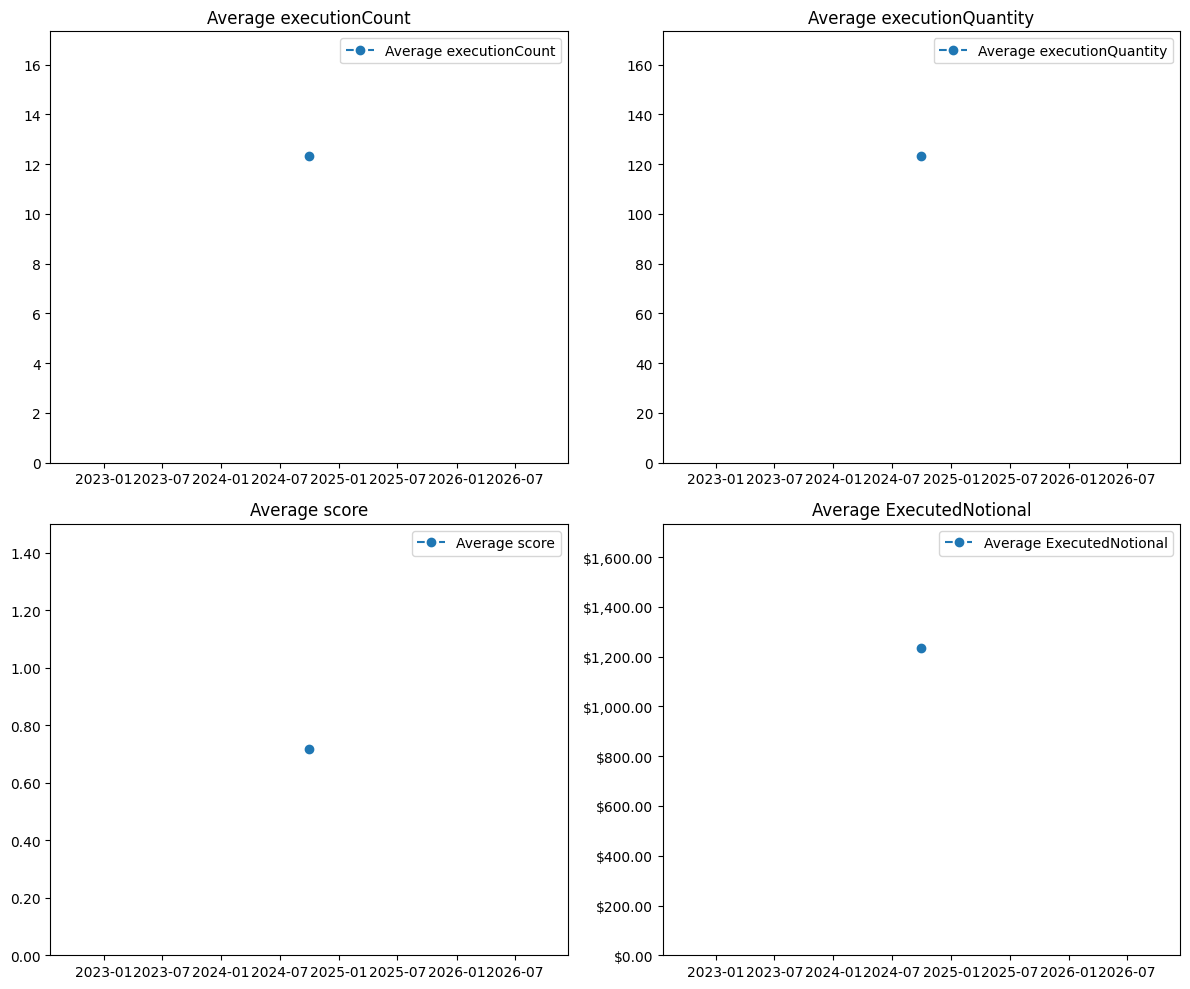

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#--------------Skip This
data = {
    'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/20/2024', '10/01/2024', '10/10/2024'],
    'mpid': ['ABC', 'DEF', 'ABC', 'DEF', 'ABC', 'DEF'],
    'token': [123, 456, 123, 456, 123, 456],
    'score': [0.85, 0.7, 0.9, 0.6, 0.95, 0.5],
    'executionCount': [10, 15, 8, 12, 20, 25],
    'executionQuantity': [100, 150, 80, 120, 200, 250],
    'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40, 2000.25, 2500.65]
}


df = pd.DataFrame(data)


df['tradeDate'] = pd.to_datetime(df['tradeDate'], format='%m/%d/%Y')


df['ID'] = df['mpid'] + '_' + df['token'].astype(str)

#--------------Skip This

startDate = '2024-09-20'
endDate = '2024-09-21'
# filtered_df = df[(df['tradeDate'] >= startDate) & (df['tradeDate'] <= endDate)]
filtered_df = df[(df['tradeDate'] >= startDate) & (df['tradeDate'] <= endDate)]
monthly_grouped = filtered_df .resample('M', on='tradeDate').agg({
    'executionCount': 'mean',
    'executionQuantity': 'mean',
    'score': 'mean',
    'ExecutedNotional': 'mean'
})


fig, axs = plt.subplots(2, 2, figsize=(12, 10))


axs[0, 0].plot(monthly_grouped.index, monthly_grouped['executionCount'], label='Average executionCount', marker='o', linestyle='--')
axs[0, 0].set_title('Average executionCount')
axs[0, 0].legend()
axs[0, 0].set_ylim(0, monthly_grouped['executionCount'].max() + 5)
axs[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))


axs[0, 1].plot(monthly_grouped.index, monthly_grouped['executionQuantity'], label='Average executionQuantity', marker='o', linestyle='--')
axs[0, 1].set_title('Average executionQuantity')
axs[0, 1].legend()
axs[0, 1].set_ylim(0, monthly_grouped['executionQuantity'].max() + 50)
axs[0, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))


axs[1, 0].plot(monthly_grouped.index, monthly_grouped['score'], label='Average score', marker='o', linestyle='--')
axs[1, 0].set_title('Average score')
axs[1, 0].legend()
axs[1, 0].set_ylim(0, 1.5)
axs[1, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}'))


axs[1, 1].plot(monthly_grouped.index, monthly_grouped['ExecutedNotional'], label='Average ExecutedNotional', marker='o', linestyle='--')
axs[1, 1].set_title('Average ExecutedNotional')
axs[1, 1].legend()
axs[1, 1].set_ylim(0, monthly_grouped['ExecutedNotional'].max() + 500)
axs[1, 1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.2f}'))


plt.tight_layout()
plt.show()


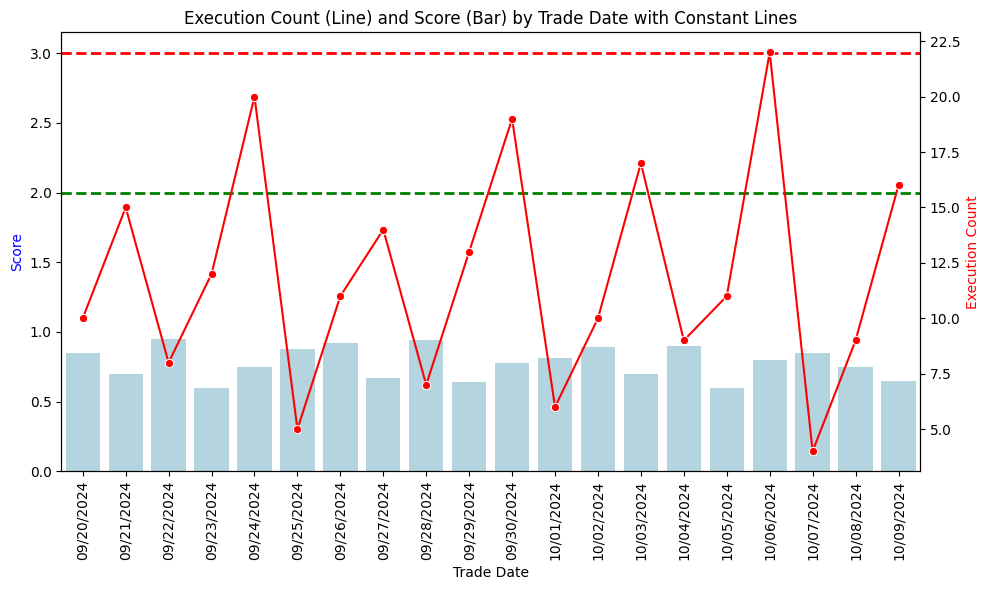

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Sample data
data = {
    'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/23/2024', '09/24/2024', '09/25/2024',
                  '09/26/2024', '09/27/2024', '09/28/2024', '09/29/2024', '09/30/2024', '10/01/2024',
                  '10/02/2024', '10/03/2024', '10/04/2024', '10/05/2024', '10/06/2024', '10/07/2024',
                  '10/08/2024', '10/09/2024'],
    'mpid': ['ABC', 'DEF', 'GHI', 'JKL', 'MNO', 'PQR', 'ABC', 'DEF', 'GHI', 'JKL', 'MNO', 'PQR',
             'ABC', 'DEF', 'GHI', 'JKL', 'MNO', 'PQR', 'ABC', 'DEF'],
    'token': [123, 456, 789, 101, 112, 131, 123, 456, 789, 101, 112, 131, 123, 456, 789, 101, 112, 131, 123, 456],
    'score': [0.85, 0.7, 0.95, 0.6, 0.75, 0.88, 0.92, 0.67, 0.94, 0.64, 0.78, 0.81, 0.89, 0.7, 0.9, 0.6, 0.8, 0.85, 0.75, 0.65],
    'executionCount': [10, 15, 8, 12, 20, 5, 11, 14, 7, 13, 19, 6, 10, 17, 9, 11, 22, 4, 9, 16],
    'executionQuantity': [100, 150, 80, 120, 200, 50, 110, 140, 70, 130, 190, 60, 100, 170, 90, 110, 220, 40, 90, 160],
    'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40, 2000.00, 500.25, 1100.60, 1400.50,
                        800.30, 1300.40, 1900.90, 600.55, 1000.85, 1700.95, 900.80, 1200.40,
                        2200.10, 400.25, 900.45, 1600.75]
}


df = pd.DataFrame(data)


df['tradeDate'] = pd.to_datetime(df['tradeDate'], format='%m/%d/%Y').dt.tz_localize(None)

df = df.sort_values('tradeDate', ascending=False)

df['tradeDateStr'] = df['tradeDate'].dt.strftime('%m/%d/%Y')


fig, ax1 = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=90)

ax2 = ax1.twinx()


sns.lineplot(x='tradeDateStr', y='executionCount', data=df, ax=ax2, marker='o', color='red')


ax2.set_ylabel('Execution Count', color='red')


sns.barplot(x='tradeDateStr', y='score', data=df, ax=ax1, color='lightblue')


ax1.set_xlabel('Trade Date')
ax1.set_ylabel('Score', color='blue')


ax1.axhline(y=2, color='green', linestyle='--', linewidth=2)
ax1.axhline(y=3, color='red', linestyle='--', linewidth=2)


plt.title("Execution Count (Line) and Score (Bar) by Trade Date with Constant Lines")


plt.gca().invert_xaxis()


plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data
data = {
    'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/23/2024', '09/24/2024', '09/25/2024',
                  '09/26/2024', '09/27/2024', '09/28/2024', '09/29/2024', '09/30/2024', '10/01/2024',
                  '10/02/2024', '10/03/2024', '10/04/2024', '10/05/2024', '10/06/2024', '10/07/2024',
                  '10/08/2024', '10/09/2024'],
    'score': [0.85, 0.7, 0.95, 0.6, 0.75, 0.88, 0.92, 0.67, 0.94, 0.64, 0.78, 0.81, 0.89, 0.7, 0.9, 0.6, 0.8, 0.85, 0.75, 0.65],
    'executionCount': [10, 15, 8, 12, 20, 5, 11, 14, 7, 13, 19, 6, 10, 17, 9, 11, 22, 4, 9, 16]
}


df = pd.DataFrame(data)

df['tradeDate'] = pd.to_datetime(df['tradeDate'], format='%m/%d/%Y')
df = df.sort_values('tradeDate', ascending=False)


fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Bar(x=df['tradeDate'], y=df['score'], name='Score', marker_color='lightblue'),
    secondary_y=False,
)


fig.add_trace(
    go.Scatter(x=df['tradeDate'], y=df['executionCount'], name='Execution Count', mode='lines+markers', marker=dict(color='red')),
    secondary_y=True,
)


fig.update_xaxes(title_text="Trade Date", tickangle=-90)  # Rotate x-axis labels
fig.update_yaxes(title_text="Score", secondary_y=False)
fig.update_yaxes(title_text="Execution Count", secondary_y=True)


fig.update_layout(
    title_text="Score (Bar) and Execution Count (Line) by Trade Date",
    xaxis=dict(tickformat='%m/%d/%Y'),  # Date formatting
    showlegend=True
)


fig.show()


In [ ]:
import pandas as pd

# Sample data for demonstration
data = {
    'tradeDate': ['2019-03-25', '2019-04-10', '2020-01-15', '2020-02-24', '2020-03-26', '2021-03-23', '2021-03-24'],
    'token': [123, 456, 123, 456, 123, 456, 123],
    'score': [0.85, 0.7, 0.95, 0.6, 0.75, 0.65, 0.90],
    'executionCount': [10, 15, 8, 12, 20, 22, 25],
    'executionQuantity': [100, 150, 80, 120, 200, 250, 300],
    'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40, 2000.00, 2500.00, 3000.00]
}
df = pd.DataFrame(data)


df['tradeDate'] = pd.to_datetime(df['tradeDate'], format='%Y-%m-%d')


start_date = pd.Timestamp('2019-03-24')
end_date = pd.Timestamp('2024-03-23')


intervals = pd.date_range(start=start_date, end=end_date, freq='1M')

print(intervals)
print(type(intervals))
labels = [f"{interval.strftime('%Y-%m')} to {(interval + pd.DateOffset(months=1)).strftime('%Y-%m')}" for interval in intervals[:-1]]

# Use pd.cut to segment data into monthly bins based on tradeDate
df['CustomMonth'] = pd.cut(df['tradeDate'], bins=intervals, right=False, labels=labels)

# Group by CustomMonth and token, and calculate mean, median, and std
monthly_stats = df.groupby(['CustomMonth', 'token']).agg({
    'score': ['mean', 'median', 'std'],
    'executionCount': ['mean', 'median', 'std'],
    'executionQuantity': ['mean', 'median', 'std'],
    'ExecutedNotional': ['mean', 'median', 'std']
}).reset_index()

# Display the result
print(monthly_stats)


DatetimeIndex(['2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
               '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
               '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30',
               '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31',
      

<ipython-input-23-24138caeaa81>:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_stats = df.groupby(['CustomMonth', 'token']).agg({


In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/20/2024', '09/20/2024'],
    'mpid': ['ABC', 'DEF', 'ABC', 'DEF' , "c"],
    'token': [123, 456, 123, 0 , 0 ],
    'score': [0.85, 0.70, 0.90, 0.60  , 0.60],
    'executionCount': [10, 15, 8, 12 , 12],
    'executionQuantity': [100, 150, 80, 120 , 120]
}
df = pd.DataFrame(data)

# Convert token column to numeric if it's not already
df['token'] = pd.to_numeric(df['token'])


mpids_with_all_zero_tokens = df.groupby('mpid')['token'].transform(lambda x: (x == 0).all())


all_zero_token_df = df[mpids_with_all_zero_tokens]


filtered_df = df[~mpids_with_all_zero_tokens & (df['token'] != 0)]


result = pd.concat([all_zero_token_df, filtered_df])


print(result)


    tradeDate mpid  token  score  executionCount  executionQuantity
4  09/20/2024    c      0   0.60              12                120
0  09/20/2024  ABC    123   0.85              10                100
1  09/21/2024  DEF    456   0.70              15                150
2  09/22/2024  ABC    123   0.90               8                 80


In [ ]:
import pandas as pd

# Sample DataFrame
data = {
    'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/20/2024', '09/20/2024'],
    'mpid': ['ABC', 'DEF', 'ABC', 'DEF' , "c"],
    'token': [123, 456, 123, 0 , 0 ],
    'score': [0.85, 0.70, 0.90, 0.60  , 0.60],
    'executionCount': [10, 15, 8, 12 , 12],
    'executionQuantity': [100, 150, 80, 120 , 120]
}
data = {
    'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/20/2024', '09/20/2024'],
    'token': [123, 456, 123, 456, 123, 456, 123],
    'score': [0.85, 0.7, 0.95, 0.6, 0.75, 0.65, 0.90],
    'executionCount': [10, 15, 8, 12, 20, 22, 25],
    'executionQuantity': [100, 150, 80, 120, 200, 250, 300],
    'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40, 2000.00, 2500.00, 3000.00]
}
df = pd.DataFrame(data)

# Convert token column to numeric if it's not already
df['token'] = pd.to_numeric(df['token'])


mpids_with_all_zero_tokens = df.groupby('mpid')['token'].transform(lambda x: (x == 0).all())


all_zero_token_df = df[mpids_with_all_zero_tokens]


filtered_df = df[~mpids_with_all_zero_tokens & (df['token'] != 0)]


result = pd.concat([all_zero_token_df, filtered_df])


print(result)


In [ ]:
import pandas as pd

# Sample data for demonstration
data = {
    'tradeDate': ['2019-03-25', '2019-04-10', '2020-01-15', '2020-02-24', '2020-03-26', '2021-03-23', '2021-03-24'],
    'token': [123, 456, 123, 456, 123, 456, 123],
    'score': [0.85, 0.7, 0.95, 0.6, 0.75, 0.65, 0.90],
    'executionCount': [10, 15, 8, 12, 20, 22, 25],
    'executionQuantity': [100, 150, 80, 120, 200, 250, 300],
    'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40, 2000.00, 2500.00, 3000.00]
}
df = pd.DataFrame(data)

# Convert tradeDate to datetime
df['tradeDate'] = pd.to_datetime(df['tradeDate'], format='%Y-%m-%d')

# Define the start and end date for yearly intervals
start_date = pd.Timestamp('2019-03-24')
end_date = pd.Timestamp('2024-03-23')

# Create yearly intervals
intervals = pd.date_range(start=start_date, end=end_date, freq='1Y')

# Define labels for yearly intervals
labels = [f"{interval.strftime('%Y-%m-%d')} to {(interval + pd.DateOffset(years=1)).strftime('%Y-%m-%d')}" for interval in intervals[:-1]]

# Segment data into yearly bins based on tradeDate
df['CustomYear'] = pd.cut(df['tradeDate'], bins=intervals, right=False, labels=labels)

# Group by CustomYear and token, and calculate mean, median, and std for the relevant columns
yearly_stats = df.groupby(['CustomYear', 'token']).agg({
    'score': ['mean', 'median', 'std'],
    'executionCount': ['mean', 'median', 'std'],
    'executionQuantity': ['mean', 'median', 'std'],
    'ExecutedNotional': ['mean', 'median', 'std']
}).reset_index()

# Display the result
print(yearly_stats)


                 CustomYear token score                  executionCount  \
                                   mean median       std           mean   
0  2019-12-31 to 2020-12-31   123  0.85   0.85  0.141421           14.0   
1  2019-12-31 to 2020-12-31   456  0.60   0.60       NaN           12.0   
2  2020-12-31 to 2021-12-31   123  0.90   0.90       NaN           25.0   
3  2020-12-31 to 2021-12-31   456  0.65   0.65       NaN           22.0   
4  2021-12-31 to 2022-12-31   123   NaN    NaN       NaN            NaN   
5  2021-12-31 to 2022-12-31   456   NaN    NaN       NaN            NaN   
6  2022-12-31 to 2023-12-31   123   NaN    NaN       NaN            NaN   
7  2022-12-31 to 2023-12-31   456   NaN    NaN       NaN            NaN   

                   executionQuantity                   ExecutedNotional  \
  median       std              mean median        std             mean   
0   14.0  8.485281             140.0  140.0  84.852814           1450.4   
1   12.0       NaN      

<ipython-input-1-f6f0abef7887>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly_stats = df.groupby(['CustomYear', 'token']).agg({


In [4]:
import pandas as pd

# Sample data for demonstration
data = {
    'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/20/2024'],
    'mpid': ['ABC', 'DEF', 'ABC', 'DEF'],
    'token': [123, 456, 123, 456],
    'score': [0.85, 0.7, 0.9, 0.6],
    'executionCount': [10, 15, 8, 12],
    'executionQuantity': [100, 150, 80, 120],
    'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40]
}

data2 = {
    'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/20/2024'],
    'mpid': ['ABC', 'DEF', 'ABC', 'DEF'],
    'token': [123, 456, 123, 456],
    'score': [0.85, 0.7, 0.9, 0.6],
    'executionCount': [10, 15, 8, 12],
    'executionQuantity': [100, 150, 80, 120],
    'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40],
    'Taker Category': ["2", "c", "2", "b"]
}

data3 = {
    'mpid': ['ABC', 'DEF', 'ABC', 'DEF'],
    'name': ['Name1', 'Name2', 'Name1', 'Name2'],
}

# Create DataFrames
df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# Create ID columns
df['ID'] = df['mpid'] + '_' + df['token'].astype(str)
df2['ID'] = df2['mpid'] + '_' + df2['token'].astype(str)

# Convert tradeDate to datetime
df['tradeDate'] = pd.to_datetime(df['tradeDate'], format='%m/%d/%Y')
df2['tradeDate'] = pd.to_datetime(df2['tradeDate'], format='%m/%d/%Y')

# Merge df with df2 to get the "Taker Category" as "pro-category"
df = pd.merge(df, df2[['mpid', 'Taker Category', 'ID']], on=['mpid', 'ID'], how='left')

# Merge with df3 to bring in the name from df3
df = pd.merge(df, df3[['mpid', 'name']], on='mpid', how='left')

# Group by ID (you can now perform groupby operations or simply view the result)
df_grouped = df.groupby('ID').first().reset_index()

# Display the final result
print(df_grouped)


        ID  tradeDate mpid  token  score  executionCount  executionQuantity  \
0  ABC_123 2024-09-20  ABC    123   0.85              10                100   
1  DEF_456 2024-09-21  DEF    456   0.70              15                150   

   ExecutedNotional Taker Category   name  
0           1000.50              2  Name1  
1           1500.75              c  Name2  


In [7]:
import pandas as pd

# Sample data for demonstration
data = {
    'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/20/2024'],
    'mpid': ['ABC', 'DEF', 'ABC', 'DEF'],
    'token': [123, 456, 123, 456],
    'score': [0.85, 0.7, 0.9, 0.6],
    'executionCount': [10, 15, 8, 12],
    'executionQuantity': [100, 150, 80, 120],
    'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40]
}

# data2 = {
#     'tradeDate': ['09/20/2024', '09/21/2024', '09/22/2024', '09/20/2024'],
#     'mpid': ['ABC', 'DEF', 'ABC', 'DEF'],
#     'token': [123, 456, 123, 456],
#     'score': [0.85, 0.7, 0.9, 0.6],
#     'executionCount': [10, 15, 8, 12],
#     'executionQuantity': [100, 150, 80, 120],
#     'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40],
#     'Taker Category': ["2", "c", "2", "b"]
# }
data2 = {
    'tradeDate': ['03/20/2024', '01/21/2024', '09/22/2024', '09/20/2024'],
    'mpid': ['ABC3', 'DEF2', 'ABC', 'DEF'],
    'token': [123, 456, 123, 456],
    'score': [0.85, 0.7, 0.9, 0.6],
    'executionCount': [10, 15, 8, 12],
    'executionQuantity': [100, 150, 80, 120],
    'ExecutedNotional': [1000.50, 1500.75, 900.80, 1200.40],
    'Taker Category': ["2", "c", "2", "b"]
}

df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)

# Create ID columns
df['ID'] = df['mpid'] + '_' + df['token'].astype(str)
df2['ID'] = df2['mpid'] + '_' + df2['token'].astype(str)
print(len(df))
# Convert tradeDate to datetime
df['tradeDate'] = pd.to_datetime(df['tradeDate'], format='%m/%d/%Y')
df2['tradeDate'] = pd.to_datetime(df2['tradeDate'], format='%m/%d/%Y')


left_join = pd.merge(df, df2[['mpid' , 'Taker Category']],
              on=['mpid'],
              how='left')
left_join.groupby(['ID']).agg({
    'score': ['mean', 'median', 'std'],
    'executionCount': ['mean', 'median', 'std'],
    'executionQuantity': ['mean', 'median', 'std'],
    'ExecutedNotional': ['mean', 'median', 'std'] ,
    number of times Taker Category changed

}).reset_index()


4
ID
ABC_123    2
DEF_456    2
dtype: int64


<ipython-input-7-669818f53c68>:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  catagoryChange = left_join.groupby('ID').apply(lambda x: (x['score'] != x['score'].shift()).sum())


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


df_clean = df.dropna(subset=['pro-category'])


X = df_clean[['score']]
y = df_clean['pro-category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = DecisionTreeRegressor()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)


Mean Squared Error: 0.0
   Actual  Predicted
0     2.0        2.0


In [ ]:
# Define the first threshold range
min_threshold = 0.1
max_threshold = 0.3


min_threshold1 = 0.5
max_threshold1 = 0.7


df['withinThreshold'] = ((df['score'] >= min_threshold) & (df['score'] <= max_threshold)) | \
                        ((df['score'] >= min_threshold1) & (df['score'] <= max_threshold1))

print(df)

   tradeDate mpid  token  score  executionCount  executionQuantity  \
0 2024-09-20  ABC    123   0.85              10                100   
1 2024-09-21  DEF    456   0.70              15                150   
2 2024-09-22  ABC    123   0.90               8                 80   
3 2024-09-20  DEF    456   0.60              12                120   

   ExecutedNotional       ID  pro-category  withinThreshold  
0           1000.50  ABC_123           2.0            False  
1           1500.75  DEF_456           NaN             True  
2            900.80  ABC_123           2.0            False  
3           1200.40  DEF_456           NaN             True  


In [ ]:
count_upperMidpoint = df['withinThreshold'].sum()
print(count_upperMidpoint)

2


In [ ]:
import pandas as pd

# Creating a new DataFrame (Future_df) with sample 'score' values
data = {
    'score': [0.78, 0.65, 0.92, 0.55, 0.83]  # Sample score values
}

Future_df = pd.DataFrame(data)

# Predicting 'pro-category' for Future_df using the trained model
Future_df['predicted_pro-category'] = model.predict(Future_df[['score']])

# Display the new DataFrame with predictions
print(Future_df)


   score  predicted_pro-category
0   0.78                     2.0
1   0.65                     2.0
2   0.92                     2.0
3   0.55                     2.0
4   0.83                     2.0


In [ ]:
count_upperMidpoint = df['upperMidpoint'].sum()
print(count_upperMidpoint)

KeyError: 'upperMidpoint'

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame (assuming this is already defined and has 'mpid' and 'score' columns)
data = {
    'mpid': ['A', 'A', 'B', 'B', 'C', 'C', 'A', 'B'],
    'score': [0.15, 0.25, 0.55, 0.75, 0.85, 0.65, 0.10, 0.30]
}
df = pd.DataFrame(data)

# Define thresholds
min_threshold = 0.1
max_threshold = 0.3
min_threshold1 = 0.5
max_threshold1 = 0.7

# Assign withinThreshold values
df['withinThreshold'] = np.where(
    ((df['score'] >= min_threshold) & (df['score'] <= max_threshold)) | \
    ((df['score'] >= min_threshold1) & (df['score'] <= max_threshold1)),
    8,  # value if condition is True
    7   # value if condition is False
)

# Group by 'mpid'
grouped = df.groupby('mpid')
print(grouped.head())

proportions = grouped.apply(lambda x: (x['withinThreshold'] == 0).sum() / x.shape[0])


proportions = proportions.reset_index(name='proportion')


print(proportions)
# grouped["proportions"] = proportions


  mpid  score  withinThreshold
0    A   0.15                8
1    A   0.25                8
2    B   0.55                8
3    B   0.75                7
4    C   0.85                7
5    C   0.65                8
6    A   0.10                8
7    B   0.30                8
  mpid  proportion
0    A         0.0
1    B         0.0
2    C         0.0


<ipython-input-19-1f97773af6ec>:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  proportions = grouped.apply(lambda x: (x['withinThreshold'] == 0).sum() / x.shape[0])


TypeError: 'DataFrameGroupBy' object does not support item assignment

In [5]:
import pandas as pd

# Sample DataFrame for demonstration
data = {
    'ID': ['A_123', 'A_123', 'B_456', 'B_456', 'C_789', 'C_789', 'A_123', 'B_456'],
    'executionCount': [10, 15, 8, 12, 20, 5, 9, 14],
    'executionQuantity': [100, 150, 80, 120, 200, 50, 90, 140],
    'score': [0.15,0.75, 0.55, 0.75, 0.85, 0.65, 0.15, 0.30],
    'j': ['hsad', 'hsad', 'hsad43', 'hsad43', 'hsad43', 'hsad44323', 'hsad43', 'hsad43']
}

# Create DataFrame
df = pd.DataFrame(data)


df['score_changed'] = df['j'] != df['j'].shift()

# Count the changes for each ID
change_counts = df.groupby('ID')['score_changed'].sum().reset_index(name='times_score_changed')

# Display the results
print(df['score_changed'].sum())


4


In [29]:
import pandas as pd
import numpy as np

# Function to generate sample data
def generate_sample_data(num_entries):
    trade_dates = pd.date_range(start='2024-09-20', periods=num_entries, freq='D').strftime('%m/%d/%Y').tolist()
    mpids = ['ABC', 'DEF', 'GHI', 'JKL']  # Sample mpids
    tokens = [123, 456, 789]  # Sample tokens
    scores = np.round(np.random.uniform(0.5, 1.0, size=num_entries), 2).tolist()
    execution_counts = np.random.randint(5, 20, size=num_entries).tolist()
    execution_quantities = np.random.randint(50, 200, size=num_entries).tolist()
    executed_notionals = np.round(np.array(execution_quantities) * np.array(scores) * 10, 2).tolist()

    return {
        'tradeDate': trade_dates,
        'mpid': np.random.choice(mpids, num_entries).tolist(),
        'token': np.random.choice(tokens, num_entries).tolist(),
        'score': scores,
        'executionCount': execution_counts,
        'executionQuantity': execution_quantities,
        'ExecutedNotional': executed_notionals
    }

# Generate larger datasets
data = generate_sample_data(num_entries=10)  # 100 entries for data
data2 = generate_sample_data(num_entries=10)  # 100 entries for data2

# Example of adding a Taker Category to data2
taker_categories = ['2', 'c', 'b', '3', 'd']
data2['Taker Category'] = np.random.choice(taker_categories, 10).tolist()

# Convert to DataFrames
df = pd.DataFrame(data)
df2 = pd.DataFrame(data2)

# Create ID columns
df['ID'] = df['mpid'] + '_' + df['token'].astype(str)
df2['ID'] = df2['mpid'] + '_' + df2['token'].astype(str)

# Convert tradeDate to datetime
df['tradeDate'] = pd.to_datetime(df['tradeDate'], format='%m/%d/%Y')
df2['tradeDate'] = pd.to_datetime(df2['tradeDate'], format='%m/%d/%Y')

# Left join
left_join = pd.merge(df, df2[['mpid', 'Taker Category']], on=['mpid'], how='left')

# Count how many times Taker Category changed
def count_changes(series):
    if series.nunique() == 1:  # Check if all values are the same
        return 0
    return (series.shift(1) != series).sum()

# Group by ID and aggregate statistics
result = left_join.groupby(['ID']).agg({
    'score': ['mean', 'median', 'std'],
    'executionCount': ['mean', 'median', 'std'],
    'executionQuantity': ['mean', 'median', 'std'],
    'ExecutedNotional': ['mean', 'median', 'std'],
    'Taker Category': count_changes
}).reset_index()

# Print the result
print(result)


        ID     score                  executionCount                   \
                mean median       std           mean median       std   
0  ABC_456  0.950000  0.950  0.011547      10.500000   10.5  4.041452   
1  DEF_123  0.660000  0.660  0.000000      18.000000   18.0  0.000000   
2  GHI_123  0.660000  0.660       NaN       9.000000    9.0       NaN   
3  GHI_456  0.806667  0.890  0.226789      14.666667   17.0  4.932883   
4  GHI_789  0.715000  0.715  0.304056      14.000000   14.0  4.242641   
5  JKL_123  0.720000  0.720  0.000000      11.000000   11.0  0.000000   

  executionQuantity                   ExecutedNotional                       \
               mean median        std             mean   median         std   
0         98.000000   98.0   5.773503       931.500000   931.50   66.164341   
1         54.000000   54.0   0.000000       356.400000   356.40    0.000000   
2         76.000000   76.0        NaN       501.600000   501.60         NaN   
3        134.333333 

In [30]:
(left_join[left_join["ID"] == "GHI_789"]).head()

,tradeDate,mpid,token,score,executionCount,executionQuantity,ExecutedNotional,ID,Taker Category
0,2024-09-20,GHI,789,0.93,17,123,1143.9,GHI_789,NaN
1,2024-09-21,GHI,789,0.50,11,97,485.0,GHI_789,NaN
